#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Creating our own Dataset

In [2]:
from sklearn.datasets import make_regression
x,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

#### Visualising the Data

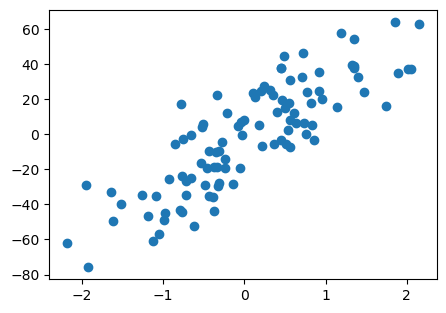

In [3]:
plt.figure (figsize = (5,3.5))
plt.scatter(x,y)

#### Splitting of the Dataset into Train and Test

In [4]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#### Applying library to check the value of slope and intercept for validation

In [5]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [6]:
print(regressor.coef_)
print(regressor.intercept_)

[27.66905703]
-2.6537533288365944


#### Making own Gradient Descent class to find slope and intercept for predictions

In [7]:
class MyGradientDescent:
    # Constructor to initialize the values of slope, intercept, learning rate, and epochs
    def __init__(self,learning_rate,epochs):
        self.m = 100   # slope
        self.b = -120  # intercept
        self.lr = learning_rate  # learning rate
        self.epochs = epochs    # number of iterations (epochs) to run the gradient descent algorithm
    
    # Method to fit the model to the given data X and y
    def fit(self,x,y):
        # Run the gradient descent algorithm for the specified number of epochs
        for i in range(self.epochs):
            
            # Calculate the gradients of the loss function with respect to slope (m) and intercept (b)
            loss_slope_b = -2 * np.sum(y - self.m*x.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*x.ravel() - self.b)*x.ravel())
            
            # Update the values of slope and intercept using the calculated gradients and learning rate
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        
        # Print the final values of slope and intercept after training
        print(self.m,self.b)
        
    # Method to make predictions using the trained model
    def predict(self,x):
        # Calculate the predicted values of y using the trained slope and intercept
        return self.m * x + self.b

In [8]:
gd = MyGradientDescent(0.001,50)
gd.fit(x_train,y_train)

27.70495570663356 -2.6797543175799925


#### Evaluating the results

In [9]:
y_pred = gd.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.688466371013573